<a href="https://colab.research.google.com/github/mugalan/classical-mechanics-from-a-geometric-point-of-view/blob/main/mechanics/assignments/motion_in_earth_moving_frame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Python modules

In [ ]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import plotly.graph_objects as go

import sympy as sym
from sympy import symbols
from sympy import *

from sympy.physics.mechanics import dynamicsymbols, init_vprinting
init_vprinting()

In [ ]:
# Install the simulation helpers
!pip install --quiet "git+https://github.com/mugalan/classical-mechanics-from-a-geometric-point-of-view.git#egg=rigid-body-sim"
import sims
mr = sims.RigidBodySim()

# Description of motion in the earth moving frame

Note that any frame fixed to the earth is not an inertial frame due to its rotation about itself and the rotation about the sun. Through this exercise we will investigate the effects of neglecting this and assuming that earth fixed frames are inertial. For this purpose we will ignore the motion of the galaxy and the sun and assume that a sun fixed frame $\mathbf{e}$ is an inertial frame.

Let $\mathbf{b}$ be an earth fixed frame with origin $O$ and $\mathbf{b}_1$ pointing towards west, $\mathbf{b}_2$ vertically up (radial to the earth and pointing outwards), and $\mathbf{b}_3$ pointing north.

Consider six orthonormal frames $\mathbf{e}$, $\mathbf{a}$, $\mathbf{c}$, $\mathbf{d}$, $\mathbf{f}$ and $\mathbf{b}$. The frames $\mathbf{e}$ and $\mathbf{a}$ have coinciding origin $O_s$ and $\mathbf{e}_3=\mathbf{a}_3$ and $\mathbf{a}$ is a counter clockwise rotation of $\alpha$ about $\mathbf{e}_3$. The frame $\mathbf{e}$ is a sunfixed frame and $\mathbf{a}$ rotaes about the $\mathbf{e}_3$ axis. We will let $\mathbf{a}_1$ point towards the center of earth.


The frame $\mathbf{c}$ is parallel to $\mathbf{a}$ with the origin $O_e$ located $r_o$ units along the $\mathbf{a}_1$ axis. The pont $O_e$ is the center of earth and the frame $\mathbf{c}$ is a frame that is moving with earth such that it is parrallel to $\mathbf{a}$.

The frame $\mathbf{d}$ and frame $\mathbf{c}$ have coinciding origins with $\mathbf{c}_3=\mathbf{d}_3$ and $\mathbf{d}$ is a counter clockwise rotation of $\beta$ about $\mathbf{c}_3$. Thus the frame $\mathbf{d}$ represents a frame that is fixed to the center of earth and $\dot{\beta}$ is the angular velocity of spin of the earth. Note that we ignore the tilt of the earth in this example.

The frame $\mathbf{f}$ is such that $\mathbf{d}_1=\mathbf{f}_1$ and $\mathbf{f}$ is a counter clockwise rotation of $\phi$ about $\mathbf{d}_1$. The origin of $\mathbf{f}$ and $\mathbf{d}$ coincide. Thus the frame $\mathbf{f}$ is also a frame fixed to earth with origin coiciding with the center of the earth.


The frame $\mathbf{b}$ is such that it is palarallel to $\mathbf{f}$ and its origin $O$ is located at a distance $r_e$ along $\mathbf{f}_2$. Thus finalliy the frame $\mathbf{b}$ is an earh fixed frame that is parallel to $\mathbf{f}$ but with the origin at the surface of the earth.

In summary we have:
$\mathbf{a}=\mathbf{e}R_3(\alpha)$, $\mathbf{c}\,//\,\mathbf{a}$, $\mathbf{d}=\mathbf{c}R_3(\beta)$, $\mathbf{f}=\mathbf{d}R_1(\phi)$ and $\mathbf{f}\,//\,\mathbf{b}$.

Hence
\begin{align}
\mathbf{b}&=\mathbf{e}R_3(\alpha)R_3(\beta)R_1(\phi)=\mathbf{e}R_3(\alpha+\beta )R_1(\phi)
\end{align}
Thus we have $\mathbf{b}=\mathbf{e}R$ where $R=R_3(\alpha+\beta )R_1(\phi)$. Define $\theta=\alpha+\beta$.


## Visualizing the frame relationships

In [ ]:
import numpy as np
import plotly.graph_objects as go


def earth_fixed_frame_visualization(
        alpha = np.deg2rad(30),   # rotation of a about e3
        beta = np.deg2rad(45),    # rotation of d about c3
        phi = np.deg2rad(35),     # rotation of f about d1
        r_o = 10.0,               # translation of c along a1
        r_e = 2.5,                # translation of b along f2 (and sphere radius)
        ):
    """
    Visualize a chain of Earth-/Sun-referenced orthonormal frames and their origins in 3D.

    This helper builds and plots (with Plotly) the following frame construction:

    Frames and origins
    ------------------
    - **e**: Sun-fixed inertial frame with origin O_s.
    - **a**: obtained by rotating frame e counter-clockwise by angle `alpha` about e3
      (so a = e R_3(alpha)). Frame a shares the origin O_s.
    - **c**: parallel to a (same orientation as a), with origin O_e translated from O_s by
      distance `r_o` along the a1 axis.
      (Interpretation: Earth center located along the instantaneous a1 direction.)
    - **d**: obtained by rotating c counter-clockwise by angle `beta` about c3:
          d = c R_3(beta).
      (Interpretation: Earth spin about its 3-axis; if time-varying, beta(t) gives spin.)
    - **f**: obtained by rotating d counter-clockwise by angle `phi` about d1:
          f = d R_x(phi).
      (Interpretation: a fixed Earth frame after applying an axial tilt-like rotation about d1.)
    - **b**: parallel to f (same orientation as f), with origin O translated from O_e by
      distance `r_e` along the f2 axis.
      (Interpretation: a local Earth-fixed frame at the surface; also uses `r_e` as the
      plotted sphere radius.)


    Parameters
    ----------
    alpha : float
        Rotation angle (radians) for a about e3 (z-axis of e). Denotes the earth's rotation angle about the sun.
    beta : float
        Rotation angle (radians) for d about c3 (z-axis of c). Denotes the earth's spin angle. Note that the tilt of earth is ignored.
    phi : float
        Rotation angle (radians) for f about d1 (x-axis of d).
    r_o : float
        Translation distance from O_s to O_e along a1.
    r_e : float
        Translation distance from O_e to O along f2. Also used as the radius of the
        transparent sphere centered at O_e.

    Returns
    -------
    plotly.graph_objects.Figure
        The Plotly 3D figure containing the frame axes, labeled origins, connection lines,
        a transparent sphere centered at O_e, and the reference circle of radius r_o in the
        e1-e2 plane.

    Notes
    -----
    - This function assumes `numpy as np` and `plotly.graph_objects as go` are available.
    - If `alpha`, `beta`, or `phi` are intended to be time-varying, pass instantaneous values
      (or wrap this in an animation loop).
    """
    ...
    # Rotation matrices
    def rot_z(theta):
        return np.array([
            [np.cos(theta), -np.sin(theta), 0],
            [np.sin(theta),  np.cos(theta), 0],
            [0,              0,             1]
        ])

    def rot_x(theta):
        return np.array([
            [1, 0, 0],
            [0, np.cos(theta), -np.sin(theta)],
            [0, np.sin(theta),  np.cos(theta)]
        ])

    # Base frame e
    e_axes = np.eye(3)
    O_s = np.array([0, 0, 0])

    # Frame a (rotation about e3)
    a_axes = rot_z(alpha)
    # Frame c (parallel to a, translated along a1)
    O_e = O_s + r_o * a_axes[:, 0]
    c_axes = a_axes
    # Frame d (rotation about c3)
    d_axes = c_axes @ rot_z(beta)
    # Frame f (rotation about d1)
    f_axes = d_axes @ rot_x(phi)
    # Frame b (parallel to f, translated along f2)
    O = O_e + r_e * f_axes[:, 1]
    b_axes = f_axes

    # Colors for frames
    colors = {
        "e": "black",
        "a": "red",
        "c": "blue",
        "d": "green",
        "f": "orange",
        "b": "purple"
    }

    # Function to create quiver-like axes for a frame
    def frame_traces(origin, axes, color):
        traces = []
        for i in range(3):
            x = [origin[0], origin[0] + axes[0, i]]
            y = [origin[1], origin[1] + axes[1, i]]
            z = [origin[2], origin[2] + axes[2, i]]
            traces.append(go.Scatter3d(
                x=x, y=y, z=z,
                mode="lines",
                line=dict(color=color, width=6),
                showlegend=False
            ))
        return traces

    # Assemble all frame traces
    frames = []
    frames += frame_traces(O_s, e_axes, colors["e"])
    frames += frame_traces(O_s, a_axes, colors["a"])
    frames += frame_traces(O_e, c_axes, colors["c"])
    frames += frame_traces(O_e, d_axes, colors["d"])
    frames += frame_traces(O_e, f_axes, colors["f"])
    frames += frame_traces(O, b_axes, colors["b"])

    fig = go.Figure(data=frames)

    # Label origins Oₛ, Oₑ, O
    for point, name in zip([O_s, O_e, O], ["Oₛ", "Oₑ", "O"]):
        fig.add_trace(go.Scatter3d(
            x=[point[0]], y=[point[1]], z=[point[2]],
            mode="text",
            text=[name],
            textfont=dict(size=18, color="black"),
            showlegend=False
        ))

    # Label endpoints of b's three axes as b₁, b₂, b₃
    b_axis_endpoints = [O + b_axes[:, i] for i in range(3)]
    for i, point in enumerate(b_axis_endpoints, start=1):
        fig.add_trace(go.Scatter3d(
            x=[point[0]], y=[point[1]], z=[point[2]],
            mode="text",
            text=[f"b{i}"],
            textfont=dict(size=16, color=colors["b"]),
            showlegend=False
        ))

    # Dashed connection lines between key origins
    fig.add_trace(go.Scatter3d(
        x=[O_s[0], O_e[0]], y=[O_s[1], O_e[1]], z=[O_s[2], O_e[2]],
        mode="lines",
        line=dict(color="gray", width=4, dash="dash"),
        showlegend=False
    ))
    fig.add_trace(go.Scatter3d(
        x=[O_e[0], O[0]], y=[O_e[1], O[1]], z=[O_e[2], O[2]],
        mode="lines",
        line=dict(color="gray", width=4, dash="dash"),
        showlegend=False
    ))

    # === Transparent sphere centered at O_e ===
    u = np.linspace(0, 2 * np.pi, 40)
    v = np.linspace(0, np.pi, 20)
    x_s = O_e[0] + r_e * np.outer(np.cos(u), np.sin(v))
    y_s = O_e[1] + r_e * np.outer(np.sin(u), np.sin(v))
    z_s = O_e[2] + r_e * np.outer(np.ones_like(u), np.cos(v))

    fig.add_trace(go.Surface(
        x=x_s, y=y_s, z=z_s,
        opacity=0.15,
        showscale=False,
        colorscale=[[0, 'lightblue'], [1, 'lightblue']],
        hoverinfo='skip'
    ))

    # === Full circle in e1-e2 plane centered at O_s, radius r_o ===
    theta_circle = np.linspace(0, 2 * np.pi, 200)
    x_circ = O_s[0] + r_o * np.cos(theta_circle)
    y_circ = O_s[1] + r_o * np.sin(theta_circle)
    z_circ = np.zeros_like(theta_circle)

    fig.add_trace(go.Scatter3d(
        x=x_circ, y=y_circ, z=z_circ,
        mode="lines",
        line=dict(color="red", width=4, dash="dot"),
        name="rotation circle",
        showlegend=False
    ))

    # Equal axis scaling
    all_points = np.column_stack([O_s, O_e, O] + b_axis_endpoints)
    max_range = np.ptp(all_points)
    center = np.mean(all_points, axis=1)

    x_range = [center[0] - max_range/2 - 2.5, center[0] + max_range/2 + 1]
    y_range = [center[1] - max_range/2 - 2.5, center[1] + max_range/2 + 1]
    z_range = [center[2] - max_range/2 - 2.5, center[2] + max_range/2 + 1]

    # Layout
    fig.update_layout(
        title="Frames e to b",
        scene=dict(
            xaxis=dict(title="X", range=x_range),
            yaxis=dict(title="Y", range=y_range),
            zaxis=dict(title="Z", range=z_range),
            aspectmode="manual",
            aspectratio=dict(x=1, y=1, z=1)
        ),
        width=950,
        height=850
    )

    fig.show()
    return fig

fig=earth_fixed_frame_visualization()

## Answer the following

### Q1) Find the angular velocity of the earth frame $\mathbf{b}$ as expressed in $\mathbf{b}$

### Q2) Show that the Newton's equations for an object influenced by gravity in the earth frame $\mathbf{b}$ are:

Let $o_e=r_oe_1$ and $o=r_ee_2$ where
$e_1=[1\:0\:0]^T$ and $e_2=[0\:1\:0]^T$.

For a particle, with position representation $X$ with respect to $\mathbf{b}$, moving under gravity the Newton's equations are given by
\begin{align}
m\ddot{X}&=-m\left(\widehat{\Omega}^2(r_ee_2+X)+2\widehat{\Omega}\dot{X}\right)+F,
\end{align}
where
\begin{align}
F=-mg\frac{r_ee_2+X}{||r_ee_2+X||}\approx -mge_2
\end{align}

Assume that the rate of change rotation of earth around the sun is very small.

### Q3) Show the followings

#### Q3.1 Show that an object of mass $1kg$ weighs less than that on the equator.


#### Q3.2 With respict to Hurricanes show that:



* In the **Northern Hemisphere** a hurricane has a **counter-clockwise** swirl when viewed from above.

* In the **Southern Hemisphere**  a hurricane has a **clockwise** swirl when viewed from above.

As an approximation of an air particle in a low pressure system at the center of the frame you may assume that the air particles are moving with a velocity pointing towards the center of the frame.

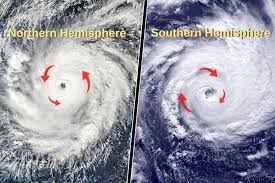

### Q4) SHow that the dynamic system form of the equations are

\begin{align}
\dot{x}&=v_x,\\
\dot{v}_x&=\dot{\theta}^2 x - 2 \dot{\theta}\dot{y}\sin{\left(\phi \right)} + 2\dot{\theta}\dot{z} \cos{\left(\phi \right)}  \\
\dot{z}&=v_z,\\
\dot{v}_z&=- 2 \dot{\theta} \dot{x}\cos{\left(\phi \right)}-\left(y \sin{\left(\phi \right)} \cos{\left(\phi \right)}  - (r_e+z)\cos^{2}{\left(\phi \right)} \right)\dot \theta^{2}  - g\\
\dot{y}&=v_y,\\
\dot{v}_y&=\left( y \sin^{2}{\left(\phi \right)} - (r_e+z)\sin{\left(\phi \right)} \cos{\left(\phi \right)} \right)\dot{\theta}^{2} + 2 \dot{\theta} \dot{x}\sin{\left(\phi \right)}
\end{align}
where $X=[x\:z\:y]^T$

### Q5) Simulate the motion of a spehrical object that is dropped from a geo-stationary weather ballon.

### Q6) Find the angluar momentum of a particle in the earth frame

Show that the angular momentum of the particle about the origin of the earth fixed frame $\mathbf{b}$ expressed in the earth fixed frame $\mathbf{b}$ is

\begin{align}
\Pi&=-m\widehat{X}^2\Omega+mX\times
\left(r_e\widehat{\Omega}e_2+\dot{X}\right)
\end{align}

### Q7) Pendulum motion in an Earth fixed frame

Consider a pendulum made up of a metal ball of mas $m$ and susepended from above using a string of length $l$. Assume that the earth fixed frame origin $O$ is located at the point where the pendulum is attached to earth (note that now $r_e$ appearing in the equations of motion is the radius of the earth plus the height, $h$, to the pendulum. Since $h<< r_e$ we can still approximately set $r_e+h\approx r_e$).

Let $X$ denote the position of the pendulum blob expressed in the $\mathbf{b}$ frame.

Show the following:

* The constraint that the pendulum length is fixed implies implies that the velocity of the pendulum is perpendicular to the pendulum.

* Due to the tension of the string, a constraint tension force $F_\lambda=-\lambda X$ where $\lambda>0$ acts on the blob. Show that the magnitude of the tension of the pendulum string is given by
\begin{align}
\frac{m}{l}\left(||\dot{X}||^2-\left(X^T\widehat{\Omega}^2X+2X^T\widehat{\Omega}\dot{X}+X^T\left(gI_{3\times 3}+r_e\widehat{\Omega}^2\right)e_2\right)\right)
\end{align}